In [9]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score

In [10]:
import openpyxl
print(openpyxl.__version__)


3.1.5


In [15]:
df = pd.read_excel('placement.xlsx')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [13]:
df.shape

(200, 2)

In [14]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

<Axes: xlabel='cgpa', ylabel='package'>

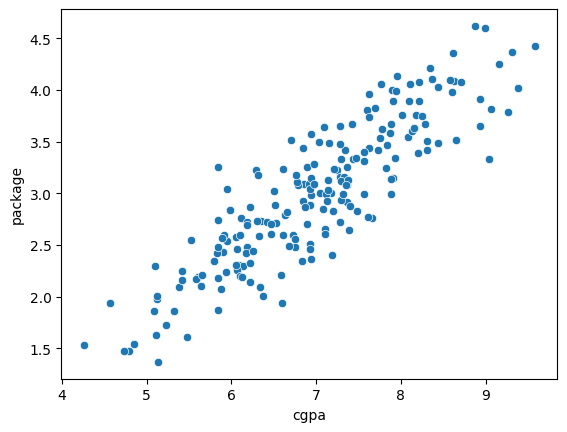

In [16]:
sns.scatterplot(x='cgpa',y='package',data=df)

In [19]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: >

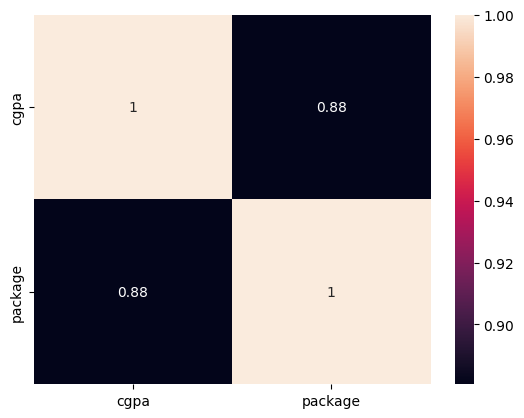

In [18]:
sns.heatmap(df.corr(),annot=True)

**segregating data into x and y**

In [20]:
x = df[['cgpa']]
y = df['package']

In [59]:
x_train , x_test , y_train, y_test = train_test_split(x,y,train_size=0.80,random_state=42)

In [60]:
x_train,y_train

(     cgpa
 79   7.18
 197  7.21
 38   8.62
 24   6.53
 122  5.12
 ..    ...
 106  6.13
 14   7.73
 92   7.90
 179  7.14
 102  5.13
 
 [160 rows x 1 columns],
 79     3.00
 197    3.24
 38     4.36
 24     2.71
 122    2.01
        ... 
 106    2.19
 14     3.42
 92     4.00
 179    3.03
 102    1.37
 Name: package, Length: 160, dtype: float64)

In [61]:
lr = LinearRegression()

In [62]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
print(lr.coef_)
print(lr.intercept_)

[0.57425647]
-1.0270069374542108


***Evaluation***

In [64]:
y_pred_train = lr.predict(x_train)
#y_pred_train

In [65]:
y_pred_test = lr.predict(x_test)
# y_pred_test

In [66]:
r2 = r2_score(y_test,y_pred_test)
r2

0.7730984312051673

from this r2 score value i can say that you cgpa(input or x ) is able to explain the 73.37% of variance in package columns

In [67]:
r2_train = r2_score(y_pred_train,y_train)
r2_train

0.711064318428033

In [68]:
MAE = mae(y_test,y_pred_test)
MAE

0.23150985393278373

In [69]:
MSE = mse(y_test,y_pred_test)
MSE

0.08417638361329656

In [72]:
RMSE = np.sqrt(MSE)
RMSE

np.float64(0.2901316659954521)

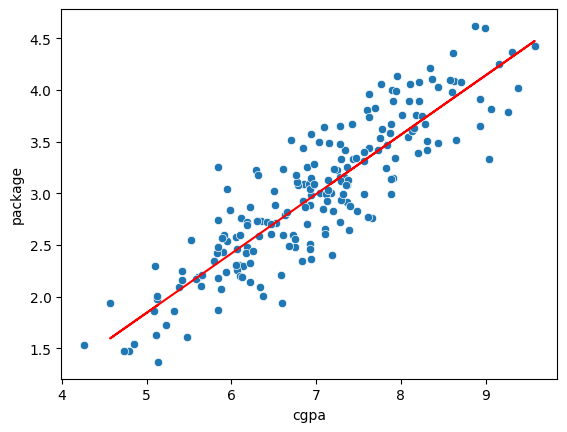

In [78]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.plot(x_train['cgpa'],lr.predict(x_train),color='red');

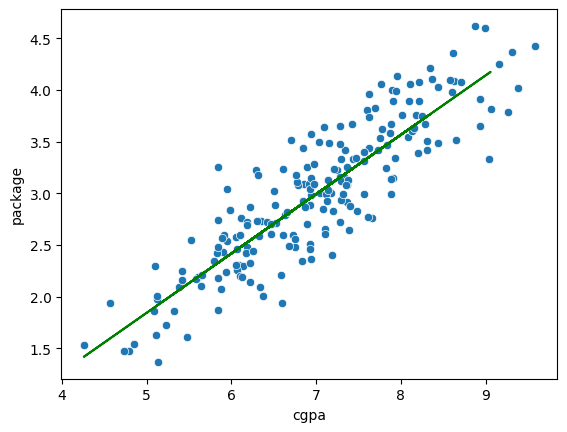

In [77]:
sns.scatterplot(x='cgpa',y='package',data=df)
plt.plot(x_test['cgpa'],lr.predict(x_test),color='green');